<a href="https://colab.research.google.com/github/JoDeMiro/FuzzyLogic/blob/main/Python_Fuzzy_Bemutat%C3%B3_a_Tan%C3%A1rn%C5%91nek_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/JoDeMiro/FuzzyLogic

In [ ]:
%%capture
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt

from ipywidgets import IntSlider
from ipywidgets import HTML
from ipywidgets import interact, interactive, fixed, interact_manual

In [ ]:
# Create universe

Étel         = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'food')

Felszolgálás = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'service')

Borravaló    = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'tip')

In [ ]:
Borravaló.defuzzify_method = 'centroid'
Borravaló.universe.mean()

15.0

No handles with labels found to put in legend.


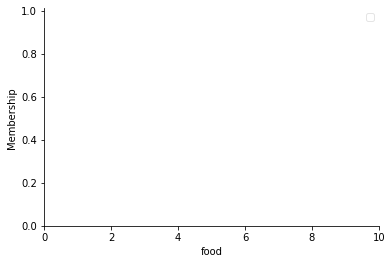

In [ ]:
Étel.view()

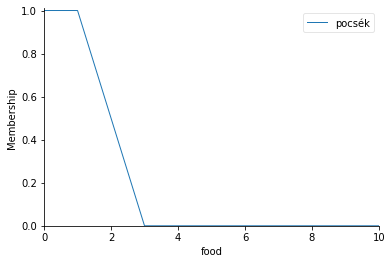

In [ ]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{napos})

Étel['pocsék'] = fuzzy.trapmf(Étel.universe, [0, 0, 1, 3])

Étel.view()

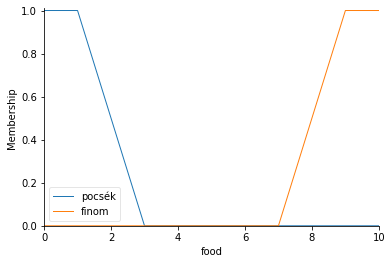

In [ ]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{felhős})

Étel['finom'] = fuzzy.trapmf(Étel.universe, [7, 9, 10, 10])

Étel.view()

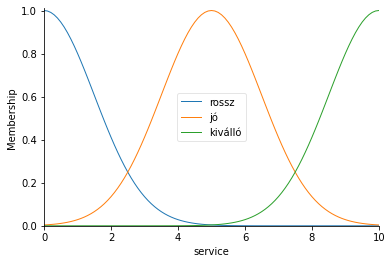

In [ ]:
# Eddig megvagyunk a Étel változó tagsági fűggvényeivel {pocsék, finom}

# Most készítsük el a Felszolgálás tagsági függvényeit is {rossz, jó, kiválló}

# Felszolgálás['rossz']   = fuzzy.zmf(Felszolgálás.universe, 0, 5)

Felszolgálás['rossz']   = fuzzy.gaussmf(Felszolgálás.universe, 0, 1.5)

Felszolgálás['jó']      = fuzzy.gaussmf(Felszolgálás.universe, 5, 1.5)

# Felszolgálás['kiválló'] = fuzzy.smf(Felszolgálás.universe, 5, 10)

Felszolgálás['kiválló'] = fuzzy.gaussmf(Felszolgálás.universe, 10, 1.5)

Felszolgálás.view()

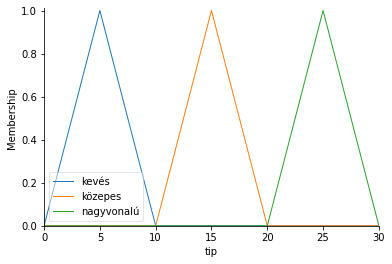

In [ ]:
# Most készítsük el a Borravaló változó tagsági függvyényeit is {kevés, közepes, nagyvonalú}

Borravaló['kevés']      = fuzzy.trimf(Borravaló.universe, [0, 5, 10])
Borravaló['közepes']    = fuzzy.trimf(Borravaló.universe, [10, 15, 20])
Borravaló['nagyvonalú'] = fuzzy.trimf(Borravaló.universe, [20, 25, 30])

Borravaló.view()

In [ ]:
# Most készítsük el a szabályokat

rule1 = ctrl.Rule(antecedent= Felszolgálás['rossz'] | Étel['pocsék'], consequent = Borravaló['kevés'])

rule2 = ctrl.Rule(antecedent= Felszolgálás['jó'], consequent = Borravaló['közepes'])

rule3 = ctrl.Rule(antecedent= Felszolgálás['kiválló'] | Étel['finom'], consequent = Borravaló['nagyvonalú'])


In [ ]:
def fuzzyDemo(Felszolgálás_ = 3, Étel_ = 8):

  # rule1 = setRules(Type)

  # a szabályok
  print(rule1)
  print(rule2)
  print(rule3)

  # két szabályunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['service'] = Felszolgálás_
  simulation.input['food'] = Étel_

  simulation.compute()

  print('----------------------------------------')
  print('borravaló  :', simulation.output['tip'])
  print('----------------------------------------')
  print(simulation.input)

  Felszolgálás.view(sim = simulation)
  Étel.view(sim = simulation)
  Borravaló.view(sim = simulation)

  return simulation


## Igy is vissza lehet kapni az adott bemenet tagsággi függvényhez tartozó értékét

In [ ]:
print(Felszolgálás.universe.shape)

# Felszolgálás['jó'] = fuzzy.gaussmf(Felszolgálás.universe, 5, 1.5)
mfx = fuzzy.gaussmf(Felszolgálás.universe, 5, 1.5)
print(mfx.shape)

# mik a tagsággi függvényhez tartozó értékek a következ pontokban (1, 2, 3.5, 5)
fuzzy.interp_membership(Felszolgálás.universe, mfx, [1.0, 2.0, 3.5, 5.0])

(101,)
(101,)


array([0.0285655 , 0.13533528, 0.60653066, 1.        ])

In [ ]:
print(Felszolgálás.__len__())
print(Felszolgálás.__getitem__('jó'))
a = Felszolgálás.__getitem__('jó')
print(type(a))
b = a.membership_value
print(type(b))
a.mf

# Elég bonyolultan de le lehet hívni Felszolgálás objektumból a magát a tagsági függvényt (mf)
fuzzy.interp_membership(Felszolgálás.universe, Felszolgálás.__getitem__('jó').mf, [1, 2, 3.5, 5])

101
service[jó]
<class 'skfuzzy.control.term.Term'>
<class 'skfuzzy.control.state.StatePerSimulation'>


array([0.0285655 , 0.13533528, 0.60653066, 1.        ])

In [ ]:
# ide kéne egy olyan plotot raknom ami mutatja az adott függvényt, és mutatja az egyes x, hez tartozó értéket minkét (ha egynél több átviteli függvényhez is tartozik az y)

OrderedDict([('rossz', service[rossz]), ('jó', service[jó]), ('kiválló', service[kiválló])])
Felszolgálás['rossz'](3) : 	0.14
Felszolgálás['jó'](3) : 	0.41
Felszolgálás['kiválló'](3) : 	0.00


Text(31, 0.41111229050718745, '0.41')

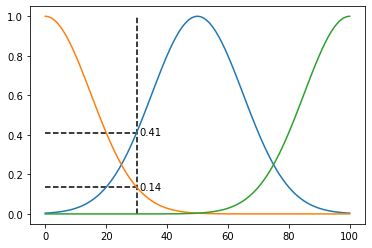

In [ ]:
plt.plot(Felszolgálás['jó'].mf)
plt.plot(Felszolgálás['rossz'].mf)
plt.plot(Felszolgálás['kiválló'].mf)

print(Felszolgálás.terms)

# Elég bonyolultan de le lehet hívni Felszolgálás objektumból a magát a tagsági függvényt (mf)
y_service_good    = fuzzy.interp_membership(Felszolgálás.universe, Felszolgálás.__getitem__('jó').mf, [3])
y_service_bad     = fuzzy.interp_membership(Felszolgálás.universe, Felszolgálás.__getitem__('rossz').mf, [3])
y_service_exelent = fuzzy.interp_membership(Felszolgálás.universe, Felszolgálás.__getitem__('kiválló').mf, [3])


print("Felszolgálás['rossz'](3) : \t{0:0.2f}".format(y_service_bad[0]))
print("Felszolgálás['jó'](3) : \t{0:0.2f}".format(y_service_good[0]))
print("Felszolgálás['kiválló'](3) : \t{0:0.2f}".format(y_service_exelent[0]))

plt.vlines(30, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')

plt.hlines(y_service_bad, xmin = 0, xmax = 30, colors = 'k', linestyles = 'dashed')
plt.hlines(y_service_good, xmin = 0, xmax = 30, colors = 'k', linestyles = 'dashed')

plt.text(31, y_service_bad[0], '{:0.2f}'.format(y_service_bad[0]), verticalalignment = 'center')
plt.text(31, y_service_good[0], '{:0.2f}'.format(y_service_good[0]), verticalalignment ='center')



## Defuzzify this membership function five ways

In [ ]:
mfx = Felszolgálás.__getitem__('rossz').mf
mx  = np.arange(0, 10.1, 0.1)

ymax  = [0.7271885928503995, 0.7963169301327854, 1.0, 1.0, 1.0]
xvals = [1.1972700116083574, 1.0121078199847917, 0.0, 0.0, 0.0]


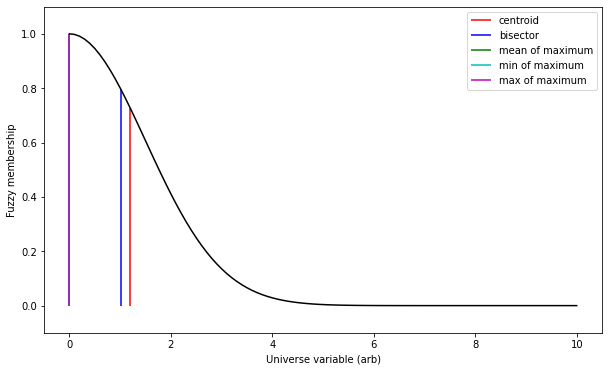

In [ ]:
defuzz_centroid = fuzzy.defuzz(mx, mfx, 'centroid')
defuzz_bisector = fuzzy.defuzz(mx, mfx, 'bisector')
defuzz_mom = fuzzy.defuzz(mx, mfx, 'mom')
defuzz_som = fuzzy.defuzz(mx, mfx, 'som')
defuzz_lom = fuzzy.defuzz(mx, mfx, 'lom')

names = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]


# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzzy.interp_membership(mx, mfx, i) for i in xvals]

print('ymax  =', ymax)
print('xvals =', xvals)


#  Display and compare defuzzification results against membership function
plt.figure(figsize=(10, 6))

plt.plot(mx, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=1)

plt.show()

In [ ]:
Étel.terms

OrderedDict([('pocsék', food[pocsék]), ('finom', food[finom])])

In [ ]:
# Elég bonyolultan de le lehet hívni Étel objektumból a magát a tagsági függvényt (mf)
fuzzy.interp_membership(Étel.universe, Étel.__getitem__('finom').mf, [8])

array([0.5])

In [ ]:
for key in Étel.terms.keys():
  print(key)

pocsék
finom


Étel['pocsék'](3) : 	0.00
Étel['finom'](3) : 	0.50


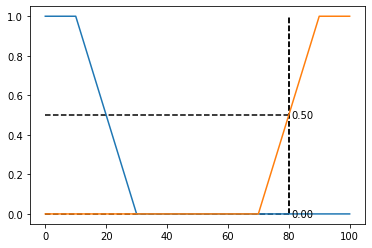

In [ ]:
for key in Étel.terms.keys():
  plt.plot(Étel[key].mf)

  value = fuzzy.interp_membership(Étel.universe, Étel.__getitem__(key).mf, [8])

  print("Étel['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

  plt.vlines(80, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
  plt.hlines(value, xmin = 0, xmax = 80, colors = 'k', linestyles = 'dashed')
  plt.text(81, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')


In [ ]:
# Tehát a bemeneti változók és a hozzá tartozó értékeke a következőek

# Felszolgálás = 3 -> Felszolgálás['rossz'](0.14) és Felszolgálás['jó'](0.41)

# Étel = 8 -> Étel['pocsék](0.00) sé Étel['finom'](0.5)


# Tekintsük most át a szabályokat

# rule1 = ctrl.Rule(antecedent= Felszolgálás['rossz'] | Étel['pocsék'], consequent = Borravaló['kevés'])

# Felszolgálás['rossz'](0.14) OR Étel['pocsék'](0.00) -> Borravaló['kevés'] -> max(0.14, 0.00) = 0.14


# rule2 = ctrl.Rule(antecedent= Felszolgálás['jó'], consequent = Borravaló['közepes'])

# Felszolgálás['jó'](0.41) -> Borravaló['közepes'] = 0.41


# rule3 = ctrl.Rule(antecedent= Felszolgálás['kiválló'] | Étel['finom'], consequent = Borravaló['nagyvonalú'])

# Felszolgálás['kiválló'](0.00) OR Étel['finom'](0.5) -> Borravaló['nagyvonalú'] -> max(0.00, 0.50) = 0.50



# Aggregáció

# Tehát a három szabály alapján a kimeneti változó (Borravaló) mindhárom {kevés, közepes, nagyvonalú} tagsági függvény aktív lesz

# A fenti számítások alapján a következő képen

# rule1 -> Borravaló['kevés'] = 0.14
# rule2 -> Borravaló['közepes'] = 0.41
# rule3 -> Borravoló['nagyvonalú'] = 0.5


# De-Fuzzyfikáció

# Borravaló = w1 * COG(Borravaló['kevés']) + w2 * COG(Borravaló['közepes']) + w3 * COG(Borravaló['nagyvonalú']) / (w1 + w2 + w3)

# Borravaló = ( 0.14 * 5 + 0.41 * 15 + 0.5 * 25 ) / ( 0.14 + 0.41 + 0.5 )

# Borravaló = 18.42

In [ ]:
( 0.14 * 5 + 0.41 * 15 + 0.5 * 25 ) / ( 0.14 + 0.41 + 0.5 )

18.42857142857143

In [ ]:
# f = interact(fuzzyDemo, Felszolgálás_ = (0, 10), Hőmérséklet_ = (0, 10));

IF service[rossz] OR food[pocsék] THEN tip[kevés]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF service[jó] THEN tip[közepes]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF service[kiválló] OR food[finom] THEN tip[nagyvonalú]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
borravaló  : 18.00589051927782
----------------------------------------
service : 3
food : 8



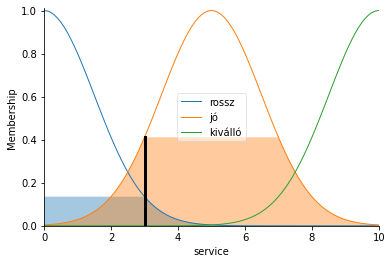

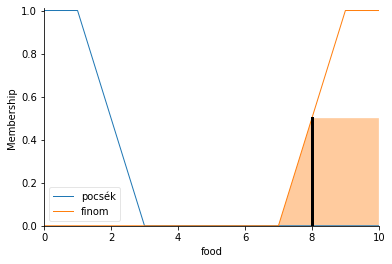

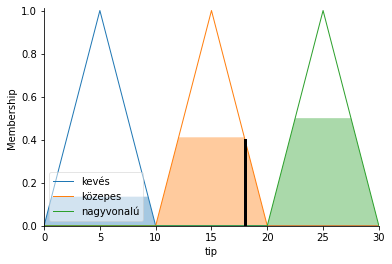

In [ ]:
sim = fuzzyDemo()

In [ ]:
type(sim)

skfuzzy.control.controlsystem.ControlSystemSimulation

In [ ]:
# hogy a pudingba tudnám lekapni a sim objektumból a végeredményt

In [ ]:
# legfőképpen azt, hogy a Borravaló objektum egyes tagsági függvényein milyen értékek vannak
# és azt, hogy a hozzá tartozó érték alapján a különböző függvény alatti terület számítáási módszerekkel
# (itt most csak COG) milyen de-fuzzyfikációs értéket kap

In [ ]:
sim.output

OrderedDict([('tip', 18.00589051927782)])

## A teljes kimeneti tér ábrázolása a két bemeneti változó függvényében

In [ ]:

# A kiértékelés nagyobb felbontással is elvégezhető de több számítással jár

felszolgalas_space = np.linspace(0, 10, 10)
etel_space = np.linspace(0, 10, 10)
x, y = np.meshgrid(felszolgalas_space, etel_space)
z = np.zeros_like(x)


# Loop through the system 10*10 times to collect the control surface
for i in range(len(felszolgalas_space)):
  for j in range(len(etel_space)):
    sim.input['food'] = x[i, j]
    sim.input['service'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

In [ ]:
# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

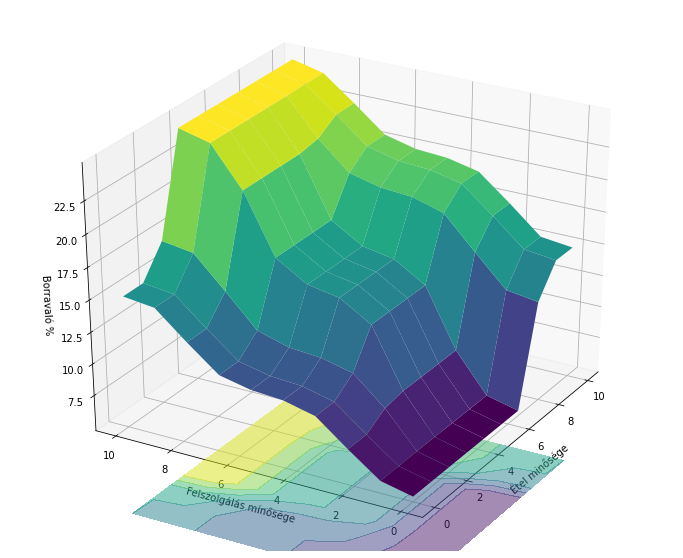

In [ ]:
# Plot the result in pretty 3D with alpha blending

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Étel minősége')
ax.set_ylabel('Felszolgálás mínősége')
ax.set_zlabel('Borravaló %')

surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x, y, z, zdir = 'z', offset = -2.5, cmap = 'viridis', alpha = 0.5)

ax.view_init(30, 210)


```
# Köszönöm a figyelmet
```

```
     Istvan Pintye
     ---------------------------------------------------------
     MTA SZTAKI Computer and Automation Research Institute
                Hungarian Academy of Sciences,
     Laboratory of Parallel and Distributed Systems
     Postal    : P.O.Box 63. H-1518 Budapest, Hungary
     Location  : 1132 Budapest Victor Hugo u. 18-22. Hungary
     Phone/Fax : +36 1 329-78-64 (secretary)
     Mobile    : +36 30 822-5188
     E-mail    : pintye@sztaki.hu
     ---------------------------------------------------------
```

